In [1]:
!pip install scikit-surprise

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
# Sample ratings data
ratings_dict = {
    "userID": [1, 1, 2, 2, 3, 3],
    "itemID": [101, 102, 101, 103, 102, 103],
    "rating": [5, 3, 4, 2, 4, 5]
}

df = pd.DataFrame(ratings_dict)
print(df)


   userID  itemID  rating
0       1     101       5
1       1     102       3
2       2     101       4
3       2     103       2
4       3     102       4
5       3     103       5


In [4]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)


In [5]:
trainset, testset = train_test_split(data, test_size=0.25)


In [6]:
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)


In [7]:
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)


RMSE: 1.0160
MAE:  0.9905


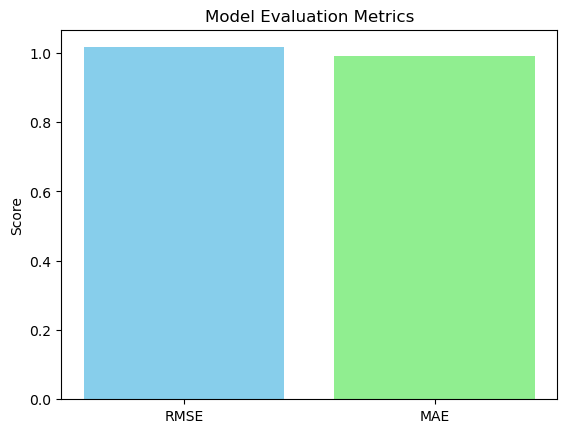

In [8]:
plt.bar(['RMSE', 'MAE'], [rmse, mae], color=['skyblue', 'lightgreen'])
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.show()
